In [1]:
from math import sqrt
from random import random, randrange, seed

In [2]:
import matplotlib
import seaborn
import pandas

In [3]:
from models import *
from methods import *

In [4]:
seaborn.set(style="darkgrid")
matplotlib.rcParams["figure.dpi"] = 300
matplotlib.rcParams["font.family"] = "serif"
matplotlib.rcParams["font.serif"] = ["Times New Roman"]

In [5]:
seed(0)

In [6]:
num_agents = 100
num_localities = 10
random_samples = 1000
locality_caps = [10] * num_localities

def _distribute_professions_caps_and_jobs(num_professions):
    assert num_professions <= num_agents
    professions = list(range(num_professions))
    profession_counts = [1 for _ in range(num_professions)]
    for _ in range(num_agents - num_professions):
        prof = randrange(num_professions)
        professions.append(prof)
        profession_counts[prof] += 1
    
    job_numbers = []
    profession_remaining = profession_counts[:]
    jobs_remaining = num_agents
    for cap in locality_caps:
        ps = [0 for _ in range(num_professions)]
        for _ in range(cap):
            a = random()
            for prof in range(num_professions):
                if a < (profession_remaining[prof] / jobs_remaining):
                    ps[prof] += 1
                    profession_remaining[prof] -= 1
                    break
                a -= profession_remaining[prof] / jobs_remaining
            jobs_remaining -= 1
        job_numbers.append(tuple(ps))
    
    assert sum(profession_remaining) == 0
        
    return profession_counts, professions, job_numbers
    
def test_correction(num_professions):
    _, professions, job_numbers = \
        _distribute_professions_caps_and_jobs(num_professions)
    qualification_probabilities = \
        [[random()] * num_localities for _ in range(num_agents)]
    correction_functions = []
    for ps in job_numbers:
        # The default parameters in the lambdas are never used, but are
        # a way of getting Python's peculiar binding behavior to work.
        # See https://docs.python.org/3/faq/programming.html#why-do-
        # lambdas-defined-in-a-loop-with-different-values-all-return-
        # the-same-result for more information.
        correction_functions.append(
            [(lambda x, P=p: min(x, P)) for p in ps])
    model = RetroactiveCorrectionModel(num_agents, locality_caps,
                                       num_professions, professions,
                                       qualification_probabilities,
                                       correction_functions,
                                       random_samples)
    return model

def test_interview(num_professions):
    _, professions, job_numbers = \
        _distribute_professions_caps_and_jobs(num_professions)
    compatibility_probabilities = [random() for _ in range(num_agents)]
    model = InterviewModel(num_agents, locality_caps, num_professions,
                           professions, job_numbers,
                           compatibility_probabilities, random_samples)
    return model

def test_coordination(num_professions):
    profession_counts, professions, job_numbers = \
        _distribute_professions_caps_and_jobs(num_professions)
    locality_num_jobs = locality_caps
    compatibility_probabilities = [] 
    for i, prof in enumerate(professions):
        competency = random()
        probs = []
        for ps in job_numbers:
            a = []
            for prof2, prof2nums in enumerate(ps):
                if prof2 == prof:
                    a += [competency] * prof2nums
                else:
                    a += [0] * prof2nums
            probs.append(a)
        compatibility_probabilities.append(probs)
    model = CoordinationModel(num_agents, locality_caps,
                              locality_num_jobs,
                              compatibility_probabilities,
                              random_samples)
    return model

settings = {"correction": test_correction, "interview": test_interview,
            "coordination": test_coordination}

In [7]:
data = []

def sample(setting, num_professions):
    m = settings[setting](num_professions)
    additive = additive_optimization(m)[1]
    greedy = greedy_algorithm(m)[1]
    datum = {}
    datum["number of professions"] = num_professions
    datum["additive"] = additive
    datum["greedy"] = greedy
    if additive > 0.0005:
        datum["greedy / additive"] = greedy / additive
    else:
        datum["greedy / additive"] = None
    datum["model"] = setting
    data.append(datum)
    return datum

In [8]:
from datetime import datetime
for _ in range(5):
    for num_professions in [2, 3, 5, 8, 10, 15]:
        for setting in settings:
            sample(setting, num_professions)
            print(datetime.now(), setting, num_professions, len(data))
from pickle import dumps
dumps(data)

Academic license - for non-commercial use only
2018-10-14 00:10:58.075169 correction 2 1
2018-10-14 00:11:13.979613 interview 2 2
2018-10-14 00:20:01.620416 coordination 2 3
2018-10-14 00:20:07.847050 correction 3 4
2018-10-14 00:20:20.479864 interview 3 5
2018-10-14 00:28:39.279035 coordination 3 6
2018-10-14 00:28:46.293673 correction 5 7
2018-10-14 00:28:57.224710 interview 5 8
2018-10-14 00:37:21.042873 coordination 5 9
2018-10-14 00:37:30.413141 correction 8 10
2018-10-14 00:37:44.416021 interview 8 11
2018-10-14 00:45:53.003424 coordination 8 12
2018-10-14 00:46:04.043153 correction 10 13
2018-10-14 00:46:17.367861 interview 10 14
2018-10-14 00:54:31.665988 coordination 10 15
2018-10-14 00:54:45.693227 correction 15 16
2018-10-14 00:55:00.811142 interview 15 17
2018-10-14 01:03:02.835669 coordination 15 18
2018-10-14 01:03:09.193564 correction 2 19
2018-10-14 01:03:25.591780 interview 2 20
2018-10-14 01:11:43.894115 coordination 2 21
2018-10-14 01:11:50.095120 correction 3 22
201

b'\x80\x03]q\x00(}q\x01(X\x15\x00\x00\x00number of professionsq\x02K\x02X\x08\x00\x00\x00additiveq\x03G@H$9X\x10bOX\x06\x00\x00\x00greedyq\x04G@I"-\x0eV\x04\x18X\x11\x00\x00\x00greedy / additiveq\x05G?\xf0\xa8O\x1b_\xe6\tX\x05\x00\x00\x00modelq\x06X\n\x00\x00\x00correctionq\x07u}q\x08(h\x02K\x02h\x03G@P\xbb\xa5\xe3S\xf7\xcfh\x04G@R\xa17K\xc6\xa7\xf0h\x05G?\xf1\xd0L \xdc\xcb\xf8h\x06X\t\x00\x00\x00interviewq\tu}q\n(h\x02K\x02h\x03G@Q\x7f;dZ\x1c\xach\x04G@S(\x83\x12n\x97\x8dh\x05G?\xf1\x84\xe4\xe3{\xe9\x1eh\x06X\x0c\x00\x00\x00coordinationq\x0bu}q\x0c(h\x02K\x03h\x03G@E\xe0\x83\x12n\x97\x8dh\x04G@H{"\xd0\xe5`@h\x05G?\xf1\xe7\x8b\x13c\xcd\xf6h\x06h\x07u}q\r(h\x02K\x03h\x03G@M\xba\xe1G\xae\x14{h\x04G@P\xbf\xae\x14z\xe1Hh\x05G?\xf2\x07\x0f\x95\xea \xe5h\x06h\tu}q\x0e(h\x02K\x03h\x03G@O*\xe1G\xae\x14zh\x04G@RT\xbcj~\xf9\xdbh\x05G?\xf2\xd2\x14\xd6\x8e\xcf\xb3h\x06h\x0bu}q\x0f(h\x02K\x05h\x03G@E\xb2\x0cI\xba^3h\x04G@H\xf8\xd4\xfd\xf3\xb6Ih\x05G?\xf2j\x96&\xa4\xdazh\x06h\x07u}q\x10(h\x02K\x05h\

In [9]:
def _format_y(ratio):
    return f"{ratio-1:,.0%}"

def plot():
    d = pandas.DataFrame(data)
    g = seaborn.catplot(x="number of professions", y="greedy / additive",
                        hue="model",
                        hue_order=["correction", "interview",
                                   "coordination"],
                        data=d)
    for ax in g.axes[0]:
        vals = ax.get_yticks()
        ax.set_yticklabels([_format_y(x) for x in vals])
        ax.set_ylabel("improvement of greedy over additive")
    g.savefig("num_professions.pdf")
    
def plot_absolute_utilities():
    d = pandas.DataFrame(data)
    g = seaborn.catplot(x="number of professions", y="additive",
                        hue="model",
                        hue_order=["correction", "interview",
                                   "coordination"],
                        data=d)
    g.savefig("num_professions_additive.pdf")
    g = seaborn.catplot(x="number of professions", y="greedy", hue="model",
                        hue_order=["correction", "interview",
                                   "coordination"],
                        data=d)
    g.savefig("num_professions_greedy.pdf")

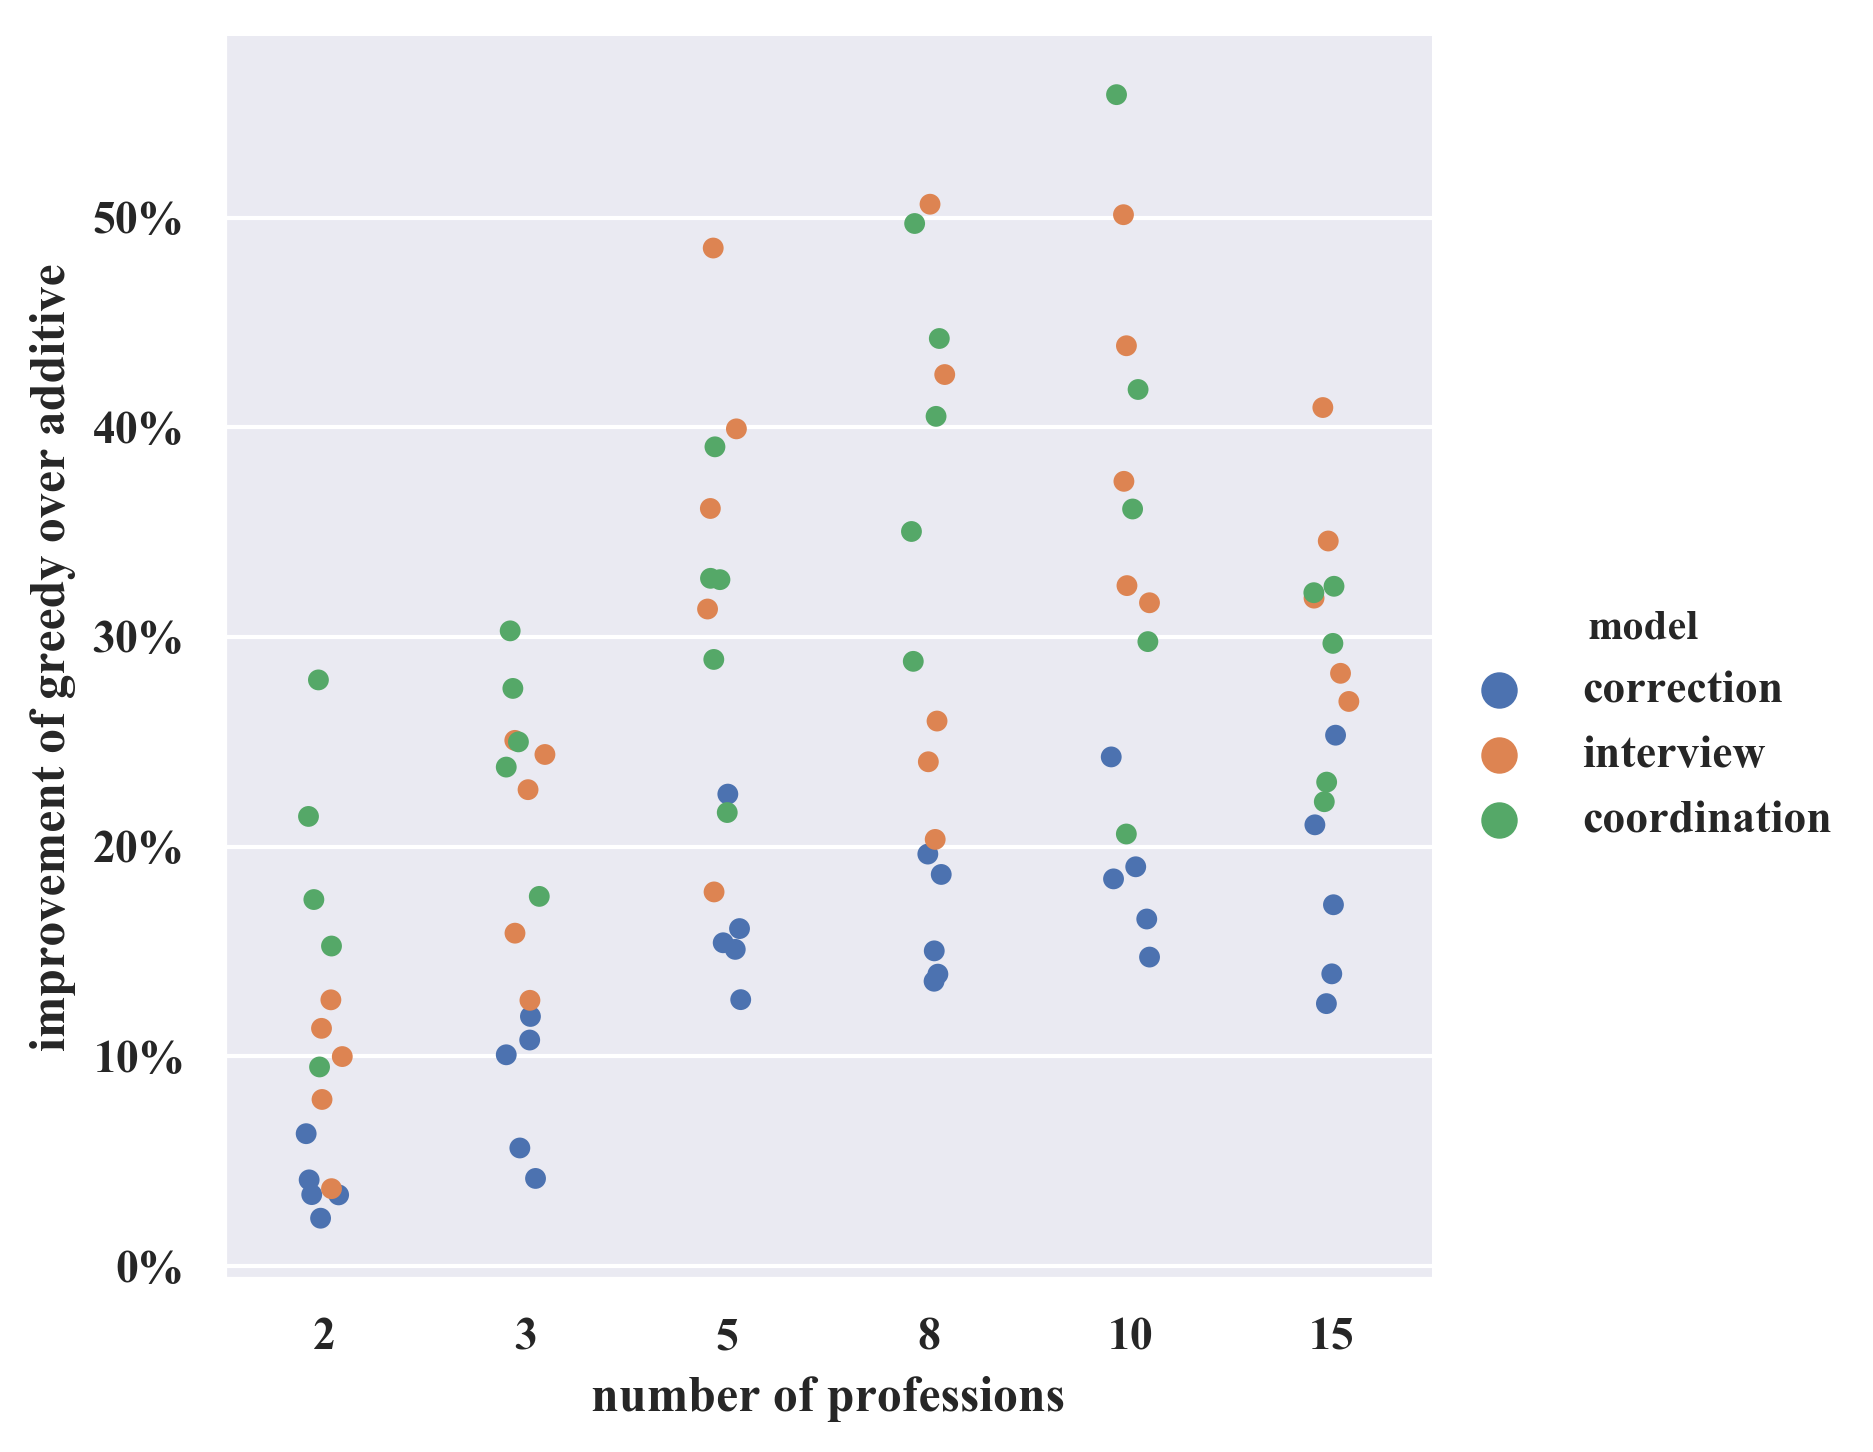

In [10]:
plot()

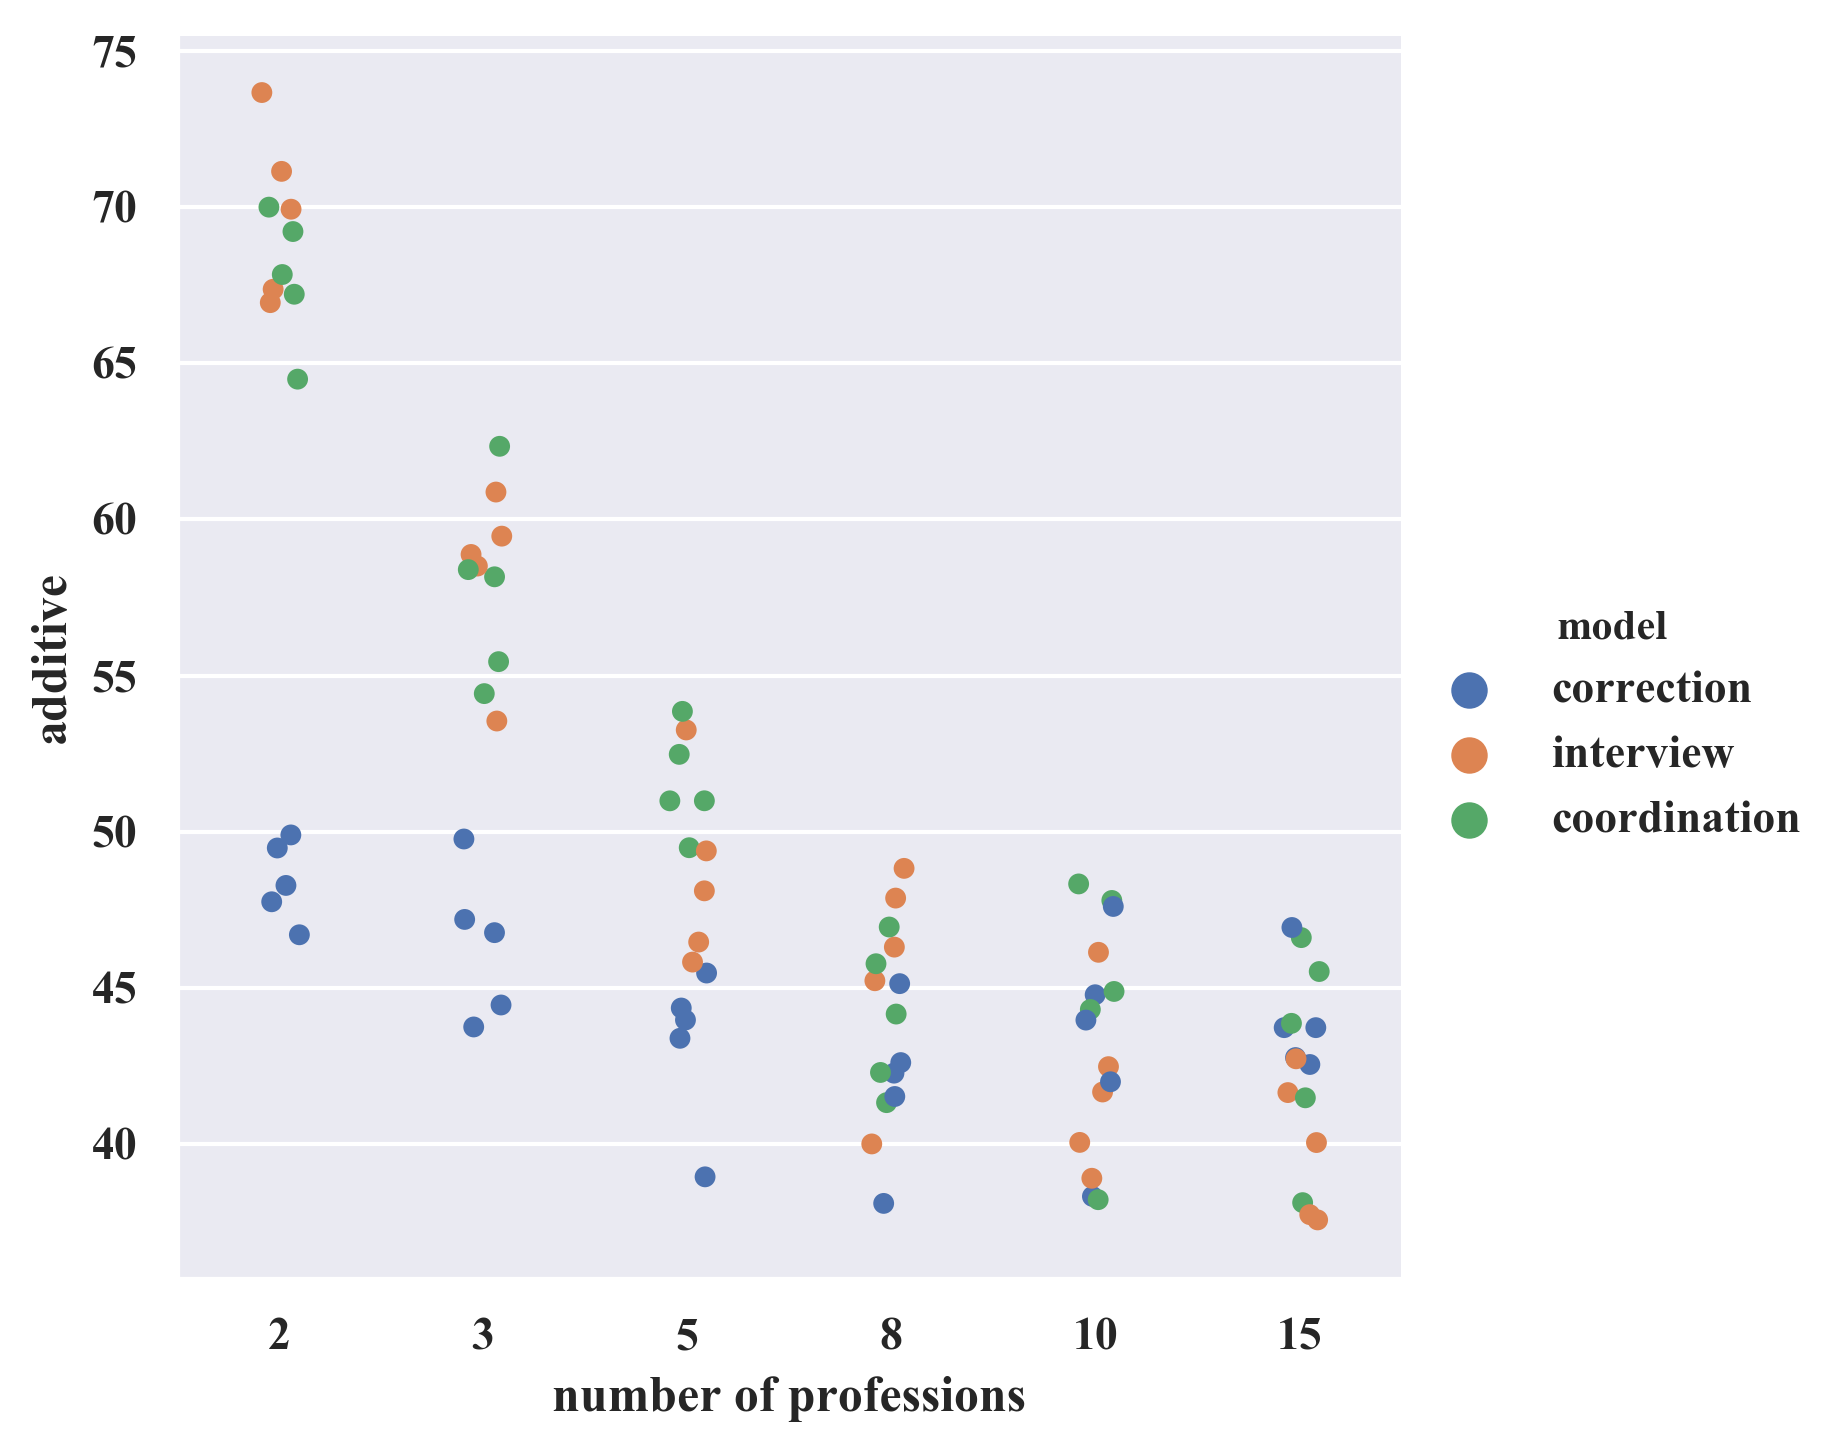

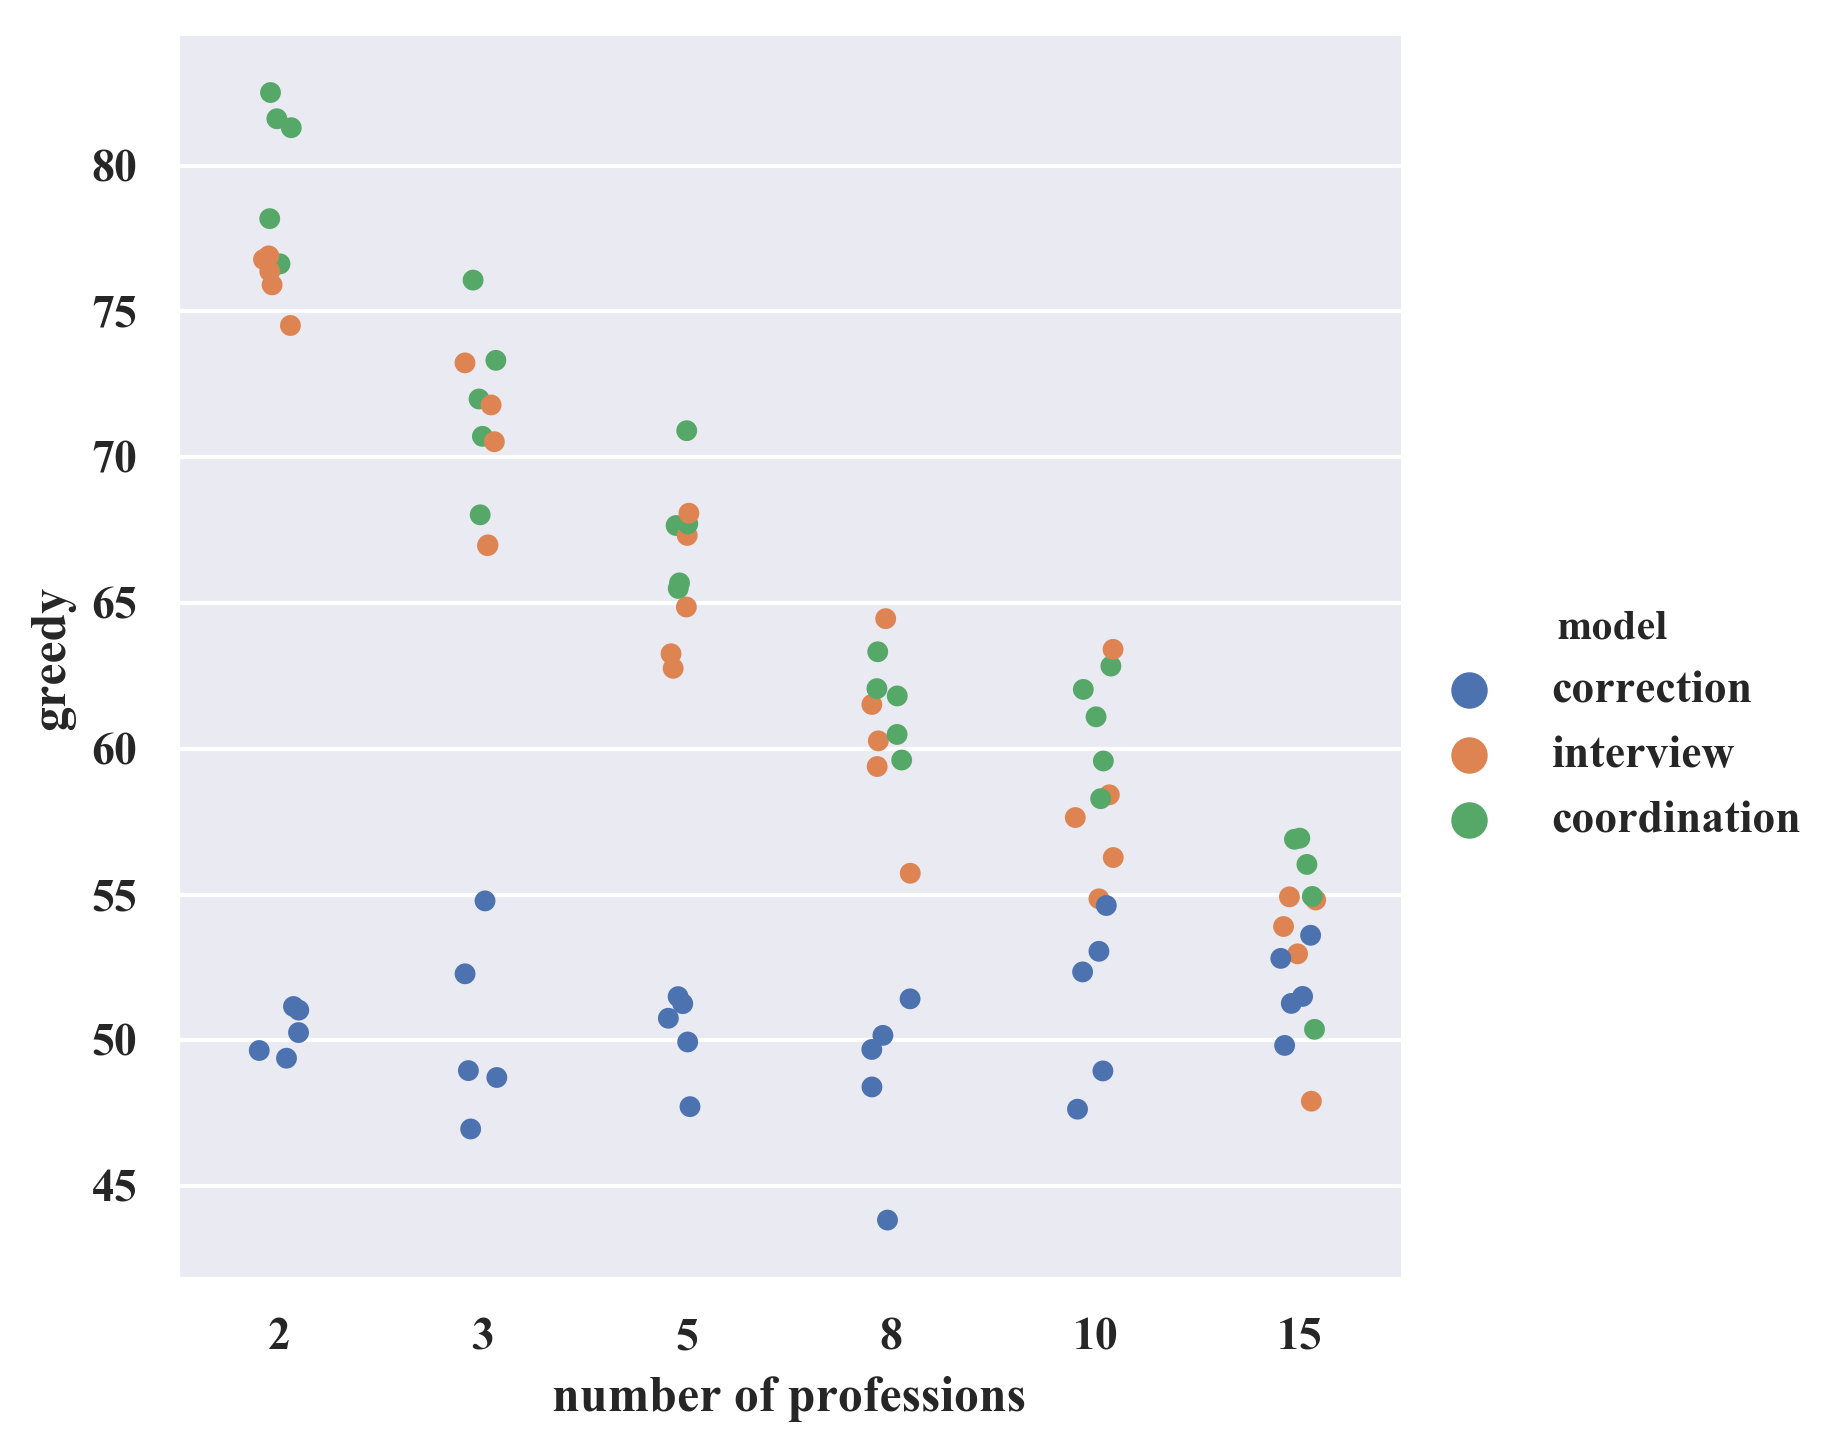

In [11]:
plot_absolute_utilities()